In [2]:
#coding:utf-8
%matplotlib inline
'''
傅里叶变换
'''
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

(<matplotlib.axes._subplots.AxesSubplot at 0x23f788bacf8>,
 Text(0.5,1,'center'))

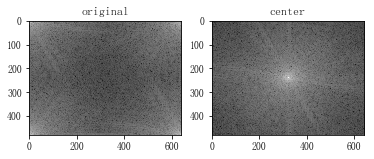

In [3]:
fft = np.fft.fft2(gray)
# 中心化
fftshift = np.fft.fftshift(fft)

#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
s1 = np.log(np.abs(fft))
s2 = np.log(np.abs(fftshift))
plt.subplot(121),plt.imshow(s1,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(s2,'gray'),plt.title('center')

(<matplotlib.axes._subplots.AxesSubplot at 0x23f7af9ca90>,
 Text(0.5,1,'center'))

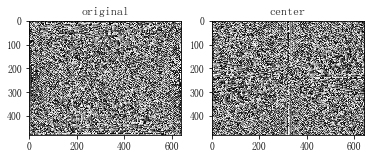

In [4]:
# 显示相位
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到较小的范围（比如0-255）
ph_f = np.angle(f)
ph_fshift = np.angle(fshift)

plt.subplot(121),plt.imshow(ph_f,'gray'),plt.title('original')
plt.subplot(122),plt.imshow(ph_fshift,'gray'),plt.title('center')

(<matplotlib.axes._subplots.AxesSubplot at 0x23f7a539f98>,
 Text(0.5,1,'img back'))

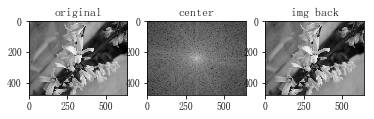

In [5]:
#频域变换到时域的操作
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到0-255
s1 = np.log(np.abs(fshift))
plt.subplot(131),plt.imshow(gray,'gray'),plt.title('original')
plt.subplot(132),plt.imshow(s1,'gray'),plt.title('center')
# 逆变换
f1shift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f1shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
plt.subplot(133),plt.imshow(img_back,'gray'),plt.title('img back')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

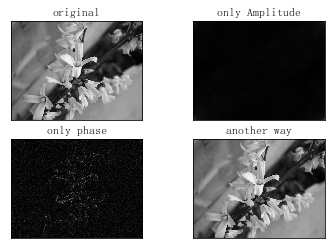

In [6]:
#用一副图像的振幅或者相位来将频域内图像恢复到时域
img = gray
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
#取绝对值：将复数变化成实数
#取对数的目的为了将数据变化到0-255
s1 = np.log(np.abs(fshift))
plt.subplot(221),plt.imshow(img,'gray'),plt.title('original')
plt.xticks([]),plt.yticks([])
#---------------------------------------------
# 逆变换--取绝对值就是振幅
f1shift = np.fft.ifftshift(np.abs(fshift))
img_back = np.fft.ifft2(f1shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(222),plt.imshow(img_back,'gray'),plt.title('only Amplitude')
plt.xticks([]),plt.yticks([])
#---------------------------------------------
# 逆变换--取相位
f2shift = np.fft.ifftshift(np.angle(fshift))
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(223),plt.imshow(img_back,'gray'),plt.title('only phase')
plt.xticks([]),plt.yticks([])
#---------------------------------------------
# 逆变换--将两者合成看看
s1 = np.abs(fshift) #取振幅
s1_angle = np.angle(fshift) #取相位
s1_real = s1*np.cos(s1_angle) #取实部
s1_imag = s1*np.sin(s1_angle) #取虚部
s2 = np.zeros(img.shape,dtype=complex) 
s2.real = np.array(s1_real) #重新赋值给s2
s2.imag = np.array(s1_imag)

f2shift = np.fft.ifftshift(s2) #对新的进行逆变换
img_back = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_back = np.abs(img_back)
#调整大小范围便于显示
img_back = (img_back-np.amin(img_back))/(np.amax(img_back)-np.amin(img_back))
plt.subplot(224),plt.imshow(img_back,'gray'),plt.title('another way')
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

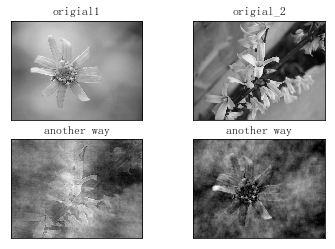

In [8]:
# 合成图像
img_flower = cv2.imread('../datas/f1.jpg',0) #直接读为灰度图像
img_man = cv2.imread('../datas/f2.jpg',0) #直接读为灰度图像
plt.subplot(221),plt.imshow(img_flower,'gray'),plt.title('origial1')
plt.xticks([]),plt.yticks([])
plt.subplot(222),plt.imshow(img_man,'gray'),plt.title('origial_2')
plt.xticks([]),plt.yticks([])
#--------------------------------
f1 = np.fft.fft2(img_flower)
f1shift = np.fft.fftshift(f1)
f1_A = np.abs(f1shift) #取振幅
f1_P = np.angle(f1shift) #取相位
#--------------------------------
f2 = np.fft.fft2(img_man)
f2shift = np.fft.fftshift(f2)
f2_A = np.abs(f2shift) #取振幅
f2_P = np.angle(f2shift) #取相位
#---图1的振幅--图2的相位--------------------
img_new1_f = np.zeros(img_flower.shape,dtype=complex) 
img1_real = f1_A*np.cos(f2_P) #取实部
img1_imag = f1_A*np.sin(f2_P) #取虚部
img_new1_f.real = np.array(img1_real) 
img_new1_f.imag = np.array(img1_imag) 
f3shift = np.fft.ifftshift(img_new1_f) #对新的进行逆变换
img_new1 = np.fft.ifft2(f3shift)
#出来的是复数，无法显示
img_new1 = np.abs(img_new1)
#调整大小范围便于显示
img_new1 = (img_new1-np.amin(img_new1))/(np.amax(img_new1)-np.amin(img_new1))
plt.subplot(223),plt.imshow(img_new1,'gray'),plt.title('another way')
plt.xticks([]),plt.yticks([])
#---图2的振幅--图1的相位--------------------
img_new2_f = np.zeros(img_flower.shape,dtype=complex) 
img2_real = f2_A*np.cos(f1_P) #取实部
img2_imag = f2_A*np.sin(f1_P) #取虚部
img_new2_f.real = np.array(img2_real) 
img_new2_f.imag = np.array(img2_imag) 
f4shift = np.fft.ifftshift(img_new2_f) #对新的进行逆变换
img_new2 = np.fft.ifft2(f4shift)
#出来的是复数，无法显示
img_new2 = np.abs(img_new2)
#调整大小范围便于显示
img_new2 = (img_new2-np.amin(img_new2))/(np.amax(img_new2)-np.amin(img_new2))
plt.subplot(224),plt.imshow(img_new2,'gray'),plt.title('another way')
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

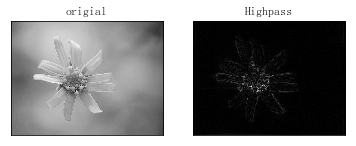

In [10]:
# 高能滤波
img_man = cv2.imread('../datas/f1.jpg',0) #直接读为灰度图像
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.ones(img_man.shape,np.uint8)
mask[rows//2-30:rows//2+30,cols//2-30:cols//2+30] = 0
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new) + 1.0e-5)
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])

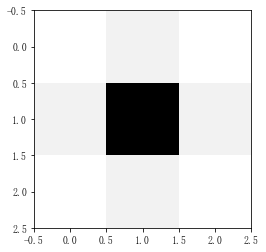

In [11]:
#拉普拉斯模板傅里叶变换到频域
laplacian = np.array([[0,1,0],[1,-4,1],[0,1,0]])
f = np.fft.fft2(laplacian)
f1shift = np.fft.fftshift(f)
img = np.log(np.abs(f1shift+1.0e-5))
plt.imshow(img,'gray')

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

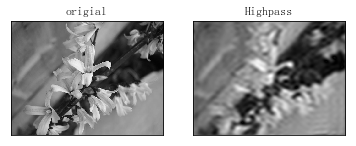

In [13]:
# 低通滤波
img_man = cv2.imread('../datas/f2.jpg',0) #直接读为灰度图像
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask = np.zeros(img_man.shape,np.uint8)
mask[rows//2-20:rows//2+20,cols//2-20:cols//2+20] = 1
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray'),plt.title('Highpass')
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

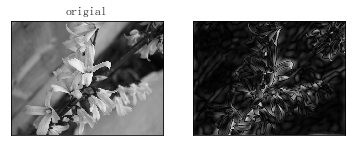

In [14]:
#理想的带通滤波器
img_man = cv2.imread('../datas/f2.jpg',0) #直接读为灰度图像
plt.subplot(121),plt.imshow(img_man,'gray'),plt.title('origial')
plt.xticks([]),plt.yticks([])
#--------------------------------
rows,cols = img_man.shape
mask1 = np.ones(img_man.shape,np.uint8)
mask1[rows//2-8:rows//2+8,cols//2-8:cols//2+8] = 0
mask2 = np.zeros(img_man.shape,np.uint8)
mask2[rows//2-80:rows//2+80,cols//2-80:cols//2+80] = 1
mask = mask1*mask2
#--------------------------------
f1 = np.fft.fft2(img_man)
f1shift = np.fft.fftshift(f1)
f1shift = f1shift*mask
f2shift = np.fft.ifftshift(f1shift) #对新的进行逆变换
img_new = np.fft.ifft2(f2shift)
#出来的是复数，无法显示
img_new = np.abs(img_new)
#调整大小范围便于显示
img_new = (img_new-np.amin(img_new))/(np.amax(img_new)-np.amin(img_new))
plt.subplot(122),plt.imshow(img_new,'gray')
plt.xticks([]),plt.yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

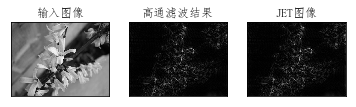

In [16]:
'''
高通滤波
'''
# 执行傅里叶变换，结果为复数矩阵
f = np.fft.fft2(gray)
# 直接取中心
fshift = np.fft.fftshift(f)
rows,cols = gray.shape
crow,ccol = rows // 2,cols // 2
# 使用蒙板60x60操作，去除低频分量
fshift[crow - 30:crow+30,ccol-30:ccol+30] = 0
# 回到左上角
f_ishift = np.fft.ifftshift(fshift)
# 使用FFT逆变换，结果是复数
img_back = np.fft.ifft2(f_ishift)
# 还原成JET图像，变成可以看的图像
img_back = np.abs(img_back)
plt.subplot(131)
plt.imshow(gray,cmap='gray')
plt.title('输入图像')
plt.xticks([]),plt.yticks([])
plt.subplot(132)
plt.imshow(img_back,cmap='gray')
plt.title('高通滤波结果')
plt.xticks([]),plt.yticks([])
plt.subplot(133)
plt.title('JET图像')
plt.imshow(img_back,'gray')
plt.xticks([]),plt.yticks([])

(Text(0.5,1,'频普图'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

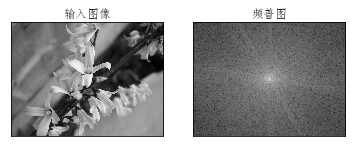

In [17]:
# 傅立叶逆变换
dft = cv2.dft(np.float32(gray),flags=cv2.DFT_COMPLEX_OUTPUT)
# 将频率为0的分量移到中心
dft_shift = np.fft.fftshift(dft)
# 频普图
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(gray, cmap = 'gray') 
plt.title('输入图像'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray') 
plt.title('频普图'), plt.xticks([]), plt.yticks([]) 

(Text(0.5,1,'频普图'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

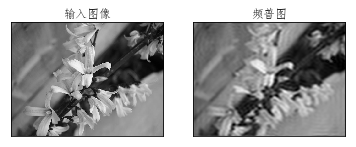

In [18]:
# 低通滤波
# 使用一个蒙板，低频设置为1，高频部分设置为0

dft = cv2.dft(np.float32(gray),flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = gray.shape
crow,ccol = rows // 2,cols // 2
mask = np.zeros((rows,cols,2),np.uint8)
# 使用Mask并执行傅里叶逆变换
mask[crow - 30:crow + 30,ccol - 30: ccol + 30] = 1
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(gray, cmap = 'gray') 
plt.title('输入图像'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(img_back, cmap = 'gray') 
plt.title('频普图'), plt.xticks([]), plt.yticks([]) 